# Emerging Technologies Tasks

My solutions to the Emerging Technologies tasks assessment.

## Task 1: Square Root of 2

>*Write a Python function called `sqrt2` that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.*

### Algorithm Description

Before discussing the algorithm used to solve this problem, it is necessary to first provide some background on how floating point numbers are stored on a computer.

#### Floating Point Numbers

Floating point numbers are used to represent fractional values and are stored in a computer as base 2 (binary) fractions. Most decimal fractions cannot be accurately represented as binary fractions and as a result, decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine \[1\]. For instance, the summation of $0.1$ and $0.2$ yields a result of $0.3$ in decimal. However, the result of this computation cannot be accurately represented in binary (see below).

In [1]:
0.1 + 0.2

0.30000000000000004

The IEEE standard defines 32-bit and 64-bit floating-point representations. The 32-bit (single-precision) format consists of a sign bit, an 8-bit exponent and 23 bits of mantissa. The 64-bit (double-precision) format consists of a sign bit, an 11-bit exponent and 52 bits of mantissa. Floating-point arithmetic on computers is therefore inherently inexact as the 24 bits of mantissa in a 32-bit floating-point number can only represent approximately 7 significant decimal digits (for doubles this is about 16 significant decimal digits \[2\]\[3\]). If a number is not exactly representable, then it must instead be approximated \[2\].

Python's float type has double-precision \[1\], and it is therefore not possible to store a number with 100 decimal places as a float. However, in Python integers have unlimited precision \[4\], so one approach to the given problem is to store all the significant digits of $\sqrt2$ as an integer. Finding the square root of a given number $p$ as an integer can be achieved by calculating the *integer square root* of $p \times 10^{2 \times q}$, where $q$ is the number of digits after the decimal point, in this case 100.

#### Finding the Integer Square Root using Newton's Method

The integer square root of a number is the greatest positive integer less than or equal to the square root of that number, and can be found using Newton's method \[5\]. Newton's algorithm works by producing successively better approximations of the roots (or zeroes) of a real-valued function \[6\]. The algorithm starts by taking some approximation of the square root ($x_{k}$) and then iteratively applying the below formula until $|x_{{k + 1}} - x_{{k}}| < 1 $ \[5\].

$$ x_{k+1} = \frac{1}{2}\left(x_{k} + \frac{n}{x_{k}}\right) $$

Assuming the value $x_{k}$ is close enough to the root, then $x_{k+1}$ will be even closer to the desired root. The rate of convergence is quadratic, meaning that the number of digits in the approximate value ($x_{k}$) doubles with each iteration [7].

### Solution

Below is my solution to task one. I start by defining a function, `isqrt()` that calculates the integer square root of a number. I then define the `sqrt2()` function which uses `isqrt()` to calculate the square root of 2 to 100 decimal places and print the result to the screen.

In [2]:
def isqrt(n: int) -> int:
    """
    Calculates the integer square root of `n` using Newton's method.
    :return: the integer square root of `n`.
    :raises ValueError: If `n` is not a positive integer.
    """
    # Code adapted from: user448810 - https://stackoverflow.com/a/15391420
    
    if (n <= 0):
        raise ValueError("n must be a positive integer")
    
    # Set an initial guess for k
    k = n // 2

    while True:
        # Cache the previous value of k
        prev_k = k
        
        # Apply the formula
        k = (k + (n // k)) // 2

        # Check loop stop condition
        if (prev_k - k) < 1:
            break
        
    return k

In [3]:
def sqrt2():
    """
    Calculates and prints to the screen the square root of 2 to 100 decimal places.
    """
    # Set the number of places to show after the decimal point
    precision = 100

    # Get the integer square root of 2 x 10^200
    # Reference: Eugene Yarmash - https://stackoverflow.com/a/32651586
    result = str(isqrt(2 * 10 ** (2 * precision)))

    # Insert the decimal point
    result = result[:1] + '.' + result[1:]

    # Output the result
    print(result)

### Testing

In order to illustrate the function's accuracy, we can compare the output of the standard library's `math.sqrt()` function with the above `sqrt2()` function.

In [4]:
from math import sqrt

print(sqrt(2))
sqrt2()

1.4142135623730951
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


We'll find that both functions appear to output the same number, but since `math.sqrt()` returns a float it can only represent the number up to about 16 decimal places. We can however do better by comparing our result to that given by the `sqrt()` function provided by Pyhon's built-in `decimal` module. Doing so, we find both functions produce the same value.

In [5]:
from decimal import (
    getcontext,
    Decimal
)

getcontext().prec = 101
result = Decimal(2).sqrt()

print(result)
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Task 2: Chi-squared Test for Independence

>*The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The [Wikipedia](https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096) article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. Use `scipy.stats` to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.*

|   | A | B | C | D | Total |
| - | - | - | - | - | ----- |
| White collar | 90 | 60 | 104 | 95 | 349 |
| Blue collar  | 30 | 50 | 51 | 20 | 151 |
| No collar    | 30 | 40 | 45 | 35 | 150 |
| **Total**        | 150 | 150 | 200 | 150 | 650 |

### Solution

In [6]:
from scipy.stats import chi2_contingency
import numpy as np

# Express the values in the table as a NumPy array
table = np.array ([
    [90, 60, 104, 95],
    [30, 50, 51, 20],
    [30, 40, 45, 35],
])

result, p, _, expected = chi2_contingency(table)

print(f"Result: {round(result, 1)}")
print(f"p value: {p}")

Result: 24.6
p value: 0.0004098425861096696


### Justification & Analysis

The `chi2_contingency` function provided by `scipy.stats` is used to compute the chi-square statistic and *p* value of the frequencies in the given contingency table. In its simplest form, the function takes an `array_like` object containing the observed frequencies in each category [8]. In the code above, we express the values in the table as a two dimensional NumPy array and pass that into the `chi2_contingency` function. The function returns a 4-tuple [8], however for the purposes of this task we are only really interested in the first two values, the test statistic and the *p* value.

Using the above function, we quickly find the test statistic value is approximately 24.6, thus verifying that the value from the Wikipedia article is accurate.

#### How it Works

The chi-squared test for independence compares our sample data in the contingency table to the distribution of values we'd expect if the null hypothesis is correct (the null hypothesis being that the variables are independent) [9]. This means in order to calculate the test statistic, we must first construct the contingency table we’d expect to see if the null hypothesis is true [9]. The expected value ($E$) of a given cell in the table is found using the below formula [9] and is calculated automatically by the `chi2_contingency` function [8].

$$
E = \frac{(row\ total)(column\ total)}{sample\ size}
$$

In the below code cell I'll use pandas to output a table of the expected values returned by `chi2_contingency`.

In [7]:
import pandas as pd

df = pd.DataFrame(columns=['A', 'B', 'C', 'D'])
df.loc["White collar"] = expected[0]
df.loc["Blue collar"] = expected[1]
df.loc["No collar"] = expected[2]

print("Expected values if the null hypothesis is correct, as calculated by chi2_contingency:")
df.round(2)

Expected values if the null hypothesis is correct, as calculated by chi2_contingency:


,A,B,C,D
White collar,80.54,80.54,107.38,80.54
Blue collar,34.85,34.85,46.46,34.85
No collar,34.62,34.62,46.15,34.62


The test statistic ($X^2$) then, is calculated by finding the sum of the squared differences between each pair of observed and expected values [9]. It is expressed by the below formula, where $O$ is the observed value and $E$ is the expected value [9]. Applying this formula over all of the cells in our table and then summing the result calculates the test statistic [9], which is the first value returned by the `chi2_contingency` function. 

$$
X^2 = \sum{\frac{(O - E)^2}{E}}
$$

#### The Test Statistic

In this example the value of the test statistic is 24.6, but if all the observed frequencies were equal to the expected frequencies, then the value would equal zero. A result of zero indicates the sample data exactly matches what we'd expect if the null hypothesis is correct [9]. Larger values indicate a more substantial divergence between our observed data and the null hypothesis [9].

## Task 3: Standard Deviation

>*The standard deviation of an array of numbers `x` is calculated using `numpy` as `np.sqrt(np.sum((x - np.mean(x))**2)/len(x))`. However, Microsoft Excel has two different versions of the standard deviation calculation, `STDEV.P` and `STDEV.S`. The `STDEV.P` function performs the above calculation but in the `STDEV.S` calculation the division is by `len(x)-1` rather than `len(x)`. Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use `numpy` to perform a simulation demonstrating that the `STDEV.S` calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.*

### Microsoft Excel's STDEV Functions

Standard deviation (SD) is a measure of the spread of a data distribution. It measures the typical distance between each data point and the mean [10]. The formula used to calculate the SD of a dataset differs depending on whether the data is being considered a population of its own, or as a *sample* of a larger population [10]. A dataset is termed a population if it contains all the members of a specified group (i.e. if it contains the entire list of possible data values) [11]. A sample on the other hand, contains only a subset of a population and the size of a sample is always less than the size of the population from which it was taken [11].

In Microsoft Excel, the function `STDEV.S` should be used to estimate the SD when given a sample of values, whereas `STDEV.P` should be used to calculate the SD based on an entire population [12].

#### Bessel's Correction

Naturally, performing calculations on a sample is less accurate than performing calculations on a population as not all of the data is available. Bessel's correction is an adjustment made to correct for the bias that occurs when working with sample data and is used to provide a better estimation of the standard deviation of a population [12]. When performing standard deviation calculations, Bessel's correction is applied by subtracting 1 from the sample size (i.e. it's applied by dividing by `len(x) - 1` instead of `len(x)`) [12].

The main difference between the `STDEV.S` function and the `STDEV.P` function is the former makes use of Bessel's correction while the latter does not [12]. Because of this distinction, the `STDEV.S` function is better suited for estimating the standard deviation of a dataset when provided with only a sample of a larger population. This is illustrated in the below example.

### Example Using NumPy

Assume in a class of 20 students the following results were awarded in an exam: (17, 98, 80, 14, 79, 78, 82, 96, 20, 55, 62, 1, 93, 63, 63, 2, 9, 4, 30, 81).

The size of our population is 20 and we can find the standard deviation by calculating the population standard deviation of this dataset. Doing so, we find the value of `STDEV.P` is approximately 34.23.

In [8]:
import numpy as np


def stdev(x: [float], sample=True) -> float:
    """
    Calculates the standard deviation of a list of numbers.

    Calling `stdev(nums, sample=False)` is equivalent to using STDEV.P in Excel,
    while `stdev(nums)` is equivalent to using STDEV.S.

    :param x: The list of numbers.
    :param sample: Should be `True` if the the data in `x` is a sample, `False` if it's a population.
    :return: The standard deviation of `x`.
    """
    divisor = len(x) if not sample else len(x) - 1
    return np.sqrt(np.sum((x - np.mean(x)) ** 2) / divisor)


# Define our results dataset
results = [
    17, 98, 80, 14, 79, 78, 82, 96, 20, 55, 62, 1, 93, 63, 63, 2, 9, 4, 30, 81
]

# Calculate the population SD of all the `results`
p_full = stdev(results, sample=False)

print(f"STDEV.P of all {len(results)} results: {p_full}")

STDEV.P of all 20 results: 34.23196605513624


However, if we now take the first 10 of these test results (i.e. take a sample) and apply both the `STDEV.S` function and the `STDEV.P` function, we will find that the `STDEV.S` function returns a value that is much closer to the population standard deviation found above. In other words, we see that the `STDEV.S` function provides a better estimate of the standard deviation of our population when performed on a sample.

In [9]:
# Now take a sample of the first 10 results & find both sample and population SD
sample_size = 10
sample_results = results[:sample_size]

p_sample = stdev(sample_results, sample=False)
s = stdev(sample_results)

print(f"STDEV.P of first {sample_size} results: {p_sample}")
print(f"STDEV.S of first {sample_size} results: {s}")

STDEV.P of first 10 results: 31.405254337451243
STDEV.S of first 10 results: 33.10404473440939


## Task 4: k-means Clustering with the Iris Dataset

>*Use `scikit-learn` to apply k-means clustering to Fisher's famous Iris data set. You will easily obtain a copy of the data set on-line. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.*

### What is k-means Clustering?

The objective of k-means clustering is to group together similar data points and discover underlying patterns by looking for a fixed number ($k$) of clusters in a dataset [13]. The k-means algorithm identifies $k$ number of centroids, and then allocates each data point to the nearest cluster, while keeping the centroids as small as possible [13].

A *cluster* refers to a collection of data points aggregated together because of certain similarities [13], while a *centroid* is the mean position of the points assigned to a cluster [14].

#### How it works

First, the k-means algorithm is provided with the number of clusters ($k$) that should be used to partition the data. It then randomly selects $k$ points from the dataset to use as the initial centroids. Each point in the dataset is assigned a cluster based on its nearest centroid [14]. The algorithm then performs iterative calculations in order to best optimize the positions of the centroids [13].

#### Accuracy
Because the initial centroids are chosen randomly, k-means will likely give different results each time it is run [14]. Furthermore, the clusters are assumed to be spherical and evenly sized, something which may reduce the accuracy of k-means clustering results [13].

### Apply k-means Clustering to the Iris data set

The iris data set contains measurements for the sepal length & width and petal length & width of 50 flowers from each of the 3 species of iris. We'll begin by importing the necessary packages and then reading in the iris dataset. Luckily `scikit-learn` provides the iris dataset out of the box and we can read in the data by calling the `sklearn.datasets.load_iris()` function.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skcl
from sklearn.datasets import load_iris

# Read in the data
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = load_iris()

We can pass the data set to a pandas `DataFrame` and print out the first few rows in order to make it easier to visualise what is contained in this dataset. We'll see each row in the data has four columns: sepal length, sepal width, petal length and petal width.

In [11]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In order to apply k-means clustering, we must provide scikit-learn with a value representing the number of clusters in our dataset. As there are three species of iris flower in the dataset, I'll pass in a value of three.

In [12]:
kmeans = skcl.KMeans(n_clusters=3).fit(iris.data)

We can use the `labels_` property to see how the k-means algorithm has separated the data into clusters. We will see there are three clusters in total, with each cluster denoted by a number from 0 through 2.

In [13]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In order to visualise the result, we can make a scatter plot of the three clusters using Matplotlib. We can also find the centroid of each respective cluster and include that in the plot.

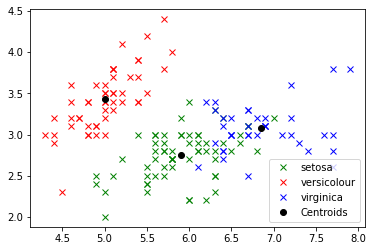

In [14]:
# Plot the data set
plt.plot(iris.data[kmeans.labels_ == 0][:,0], iris.data[kmeans.labels_ == 0][:,1], 'gx', label = 'setosa')
plt.plot(iris.data[kmeans.labels_ == 1][:,0], iris.data[kmeans.labels_ == 1][:,1], 'rx', label = 'versicolour')
plt.plot(iris.data[kmeans.labels_ == 2][:,0], iris.data[kmeans.labels_ == 2][:,1], 'bx', label = 'virginica')

# Plot the centroids of the clusters
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ko', label = 'Centroids')

plt.legend()

### Making Predictions

In order to demonstrate how k-means can be used to make predictions as to which cluster a given data point will belong, I'll pass in a sequence of random points into the `kmeans.predict()` function.

In [15]:
# Create some dummy points for classification
sepal_w = np.linspace(4.0, 8.0, 10)
sepal_l = np.linspace(1.5, 5.0, 10)
petal_w = np.linspace(1.0, 8.0, 10)
petal_l = np.linspace(-1.0, 4.0, 10)

newvals = np.vstack([
    sepal_w,
    sepal_l,
    petal_w,
    petal_l
]).T

# Predict the cluster for each of the above points
predictions = kmeans.predict(newvals)
predictions

array([1, 1, 1, 0, 0, 0, 2, 2, 2, 2])

This function returns an NumPy array containing the predicted cluster for each of our test data points. In this instance, a value of 0 indicates a point belongs to the red cluster (setosa), a value of 1 indicates a point belongs to the green cluster (versicolour), and so on. We can plot each of the above points to show where they appear on our graph.

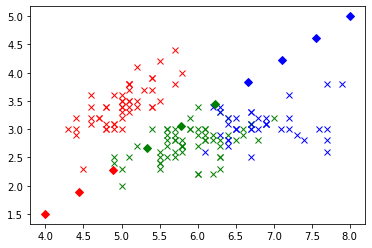

In [16]:
# Re-plot the data set
plt.plot(iris.data[kmeans.labels_ == 0][:,0], iris.data[kmeans.labels_ == 0][:,1], 'gx', label = 'setosa')
plt.plot(iris.data[kmeans.labels_ == 1][:,0], iris.data[kmeans.labels_ == 1][:,1], 'rx', label = 'versicolour')
plt.plot(iris.data[kmeans.labels_ == 2][:,0], iris.data[kmeans.labels_ == 2][:,1], 'bx', label = 'virginica')

# Plot the predicted value as a diamond shape
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1], 'gD', label = 'predicted')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1], 'rD', label = 'predicted')
plt.plot(newvals[predictions == 2][:,0], newvals[predictions == 2][:,1], 'bD', label = 'predicted')

## References

1. [*Floating Point Arithmetic: Issues and Limitations*](https://docs.python.org/3/tutorial/floatingpoint.html). The Python 3 Standard Library Documentation.
2. [*The Perils of Floating Point*](http://www.lahey.com/float.htm). Bush, Bruce M. Lahey Computer Systems, Inc.
3. [*Double-precision floating-point format*](https://en.wikipedia.org/wiki/Double-precision_floating-point_format). Wikipedia, the free encyclopedia.
4. [*Built-in Types*](https://docs.python.org/3/library/stdtypes.html). The Python 3 Standard Library Documentation.
5. [*Integer square root*](https://en.wikipedia.org/wiki/Integer_square_root). Wikipedia, the free encyclopedia.
6. [*Newton's Method*](https://en.wikipedia.org/wiki/Newton%27s_method). Wikipedia, the free encyclopedia.
7. [*Newton's method for finding roots*](https://cp-algorithms.com/num_methods/roots_newton.html). CP-Algorithms.
8. [*scipy.stats.chi2_contingency*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html). SciPy.org documentation.
9. [*How the Chi-Squared Test of Independence Works*](https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/). Frost, Jim. Statistics By Jim.
10. [*Population and sample standard deviation review*](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review). Khan Academy.
11. [*Population vs Sample Data*](http://mathbitsnotebook.com/Algebra1/StatisticsData/STPopSample.html). Roberts, Donna. MathBitsNotebook.
12. [*Standard deviation calculation*](https://exceljet.net/formula/standard-deviation-calculation). Exceljet.
13. [*Understanding K-means Clustering in Machine Learning*](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1). Towards Data Science. Dr. Michael J. Garbade.
14. [*K-Means*](https://www.scss.tcd.ie/~munnellg/projects/kmeans.html). TCD. Gary Munnelly.